In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as np
# import plotly as plt


# Import Dataset

In [2]:
df=pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Big Picture

In [3]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [4]:
df.nunique()
print('Product line transactions:',df['Product line'].value_counts())

print('Payment transactions:' , df['Payment'].value_counts())

print('Gender transactions:' , df['Gender'].value_counts())

print('City transactions:', df['City'].value_counts())

print('Branch transactions:', df['Branch'].value_counts())

Product line transactions: Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
Payment transactions: Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64
Gender transactions: Female    501
Male      499
Name: Gender, dtype: int64
City transactions: Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
Branch transactions: A    340
B    332
C    328
Name: Branch, dtype: int64


The categories Product line, Payment, Gender, Branch, and cities seems to be balanced.

In [5]:
df.info()
# No missing datas apparently


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Change Date Format -> datetime

In [7]:
import datetime

In [8]:
df['Date']=pd.to_datetime(df['Date'])


# Seaborn

In [9]:
branch_purch_byproduct=df.groupby(by=['Branch','Product line']).Total.agg(['median','sum'])
branch_purch_byproduct

median         sum
Branch Product line                                
A      Electronic accessories  207.0705  18317.1135
       Fashion accessories     277.6725  16332.5085
       Food and beverages      249.0705  17163.1005
       Health and beauty       217.1820  12597.7530
       Home and lifestyle      263.1300  22417.1955
       Sports and travel       271.2780  19372.6995
B      Electronic accessories  225.0150  17051.4435
       Fashion accessories     185.7555  16413.3165
       Food and beverages      234.8010  15214.8885
       Health and beauty       350.0700  19980.6600
       Home and lifestyle      262.5840  17549.1645
       Sports and travel       275.3100  19988.1990
C      Electronic accessories  272.5800  18968.9745
       Fashion accessories     267.3405  21560.0700
       Food and beverages      292.5405  23766.8550
       Health and beauty       275.6040  16615.3260
       Home and lifestyle      206.7975  13895.5530
       Sports and travel       266.0280  15761.9280

In [10]:
branch_purch=df.groupby(by='Branch').Total.agg(['median','sum'])
branch_purch

,median,sum
Branch,,
A,240.82800,106200.3705
B,252.88200,106197.6720
C,271.41975,110568.7065


## Type of Products bought

From the previous tables it seems that the 3 branches have a similar global incomes.
The difference seems to come how splited those incomes are in the different product lines.

[Text(0, 0, 'A'), Text(1, 0, 'C'), Text(2, 0, 'B')]

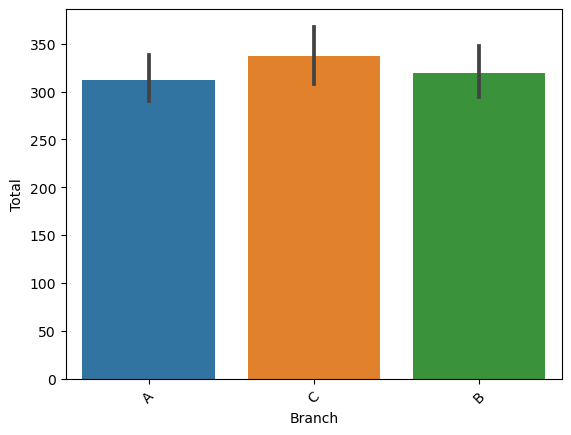

In [11]:
branch_count=sns.barplot(df,x='Branch',y='Total')
branch_count.set_xticklabels(branch_count.get_xticklabels(),rotation=45,)


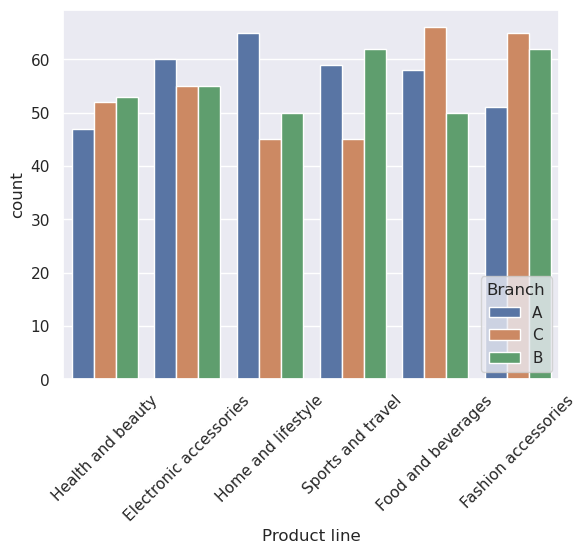

In [38]:

branch_count=sns.countplot(df,x='Product line',hue='Branch',)
branch_count.set_xticklabels(branch_count.get_xticklabels(),rotation=45,)
sns.move_legend(branch_count,"lower right")

We can see which Branch has the most transactions for each product line. For example, Branch C has more transactions in Food and Beverages, and Fashion Accessories. This does not mean this branch generates more money in those product lines!

[Text(0, 0, 'Health and beauty'),
 Text(1, 0, 'Electronic accessories'),
 Text(2, 0, 'Home and lifestyle'),
 Text(3, 0, 'Sports and travel'),
 Text(4, 0, 'Food and beverages'),
 Text(5, 0, 'Fashion accessories')]

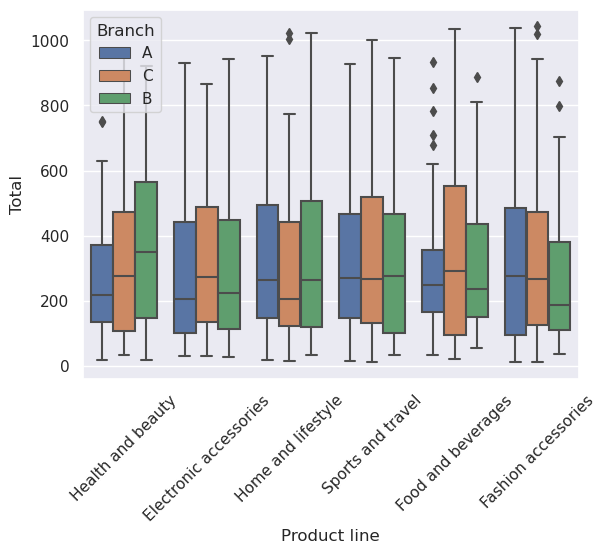

In [39]:
#By branch
product_line_purchase=sns.boxplot(data=df,x='Product line', y='Total',hue='Branch')
product_line_purchase.set_xticklabels(product_line_purchase.get_xticklabels(),rotation=45,)

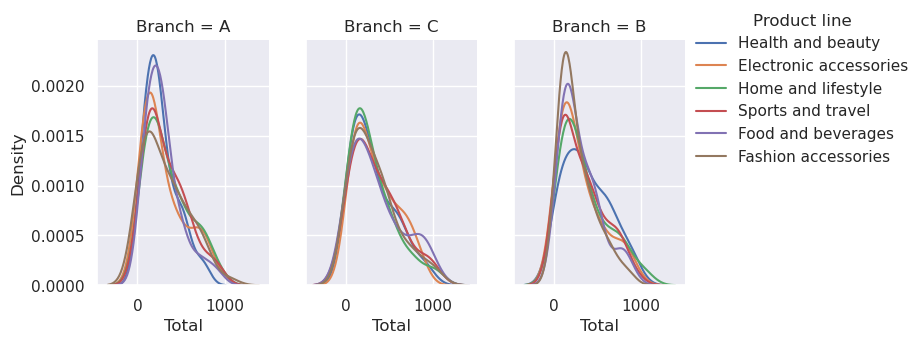

In [40]:
g=sns.FacetGrid(df, col='Branch',hue='Product line',height=3.5, aspect=.70)
g.map(sns.kdeplot,'Total')
g.add_legend()
sns.move_legend(g,'upper right')
#sns.set_theme(font_scale=1)

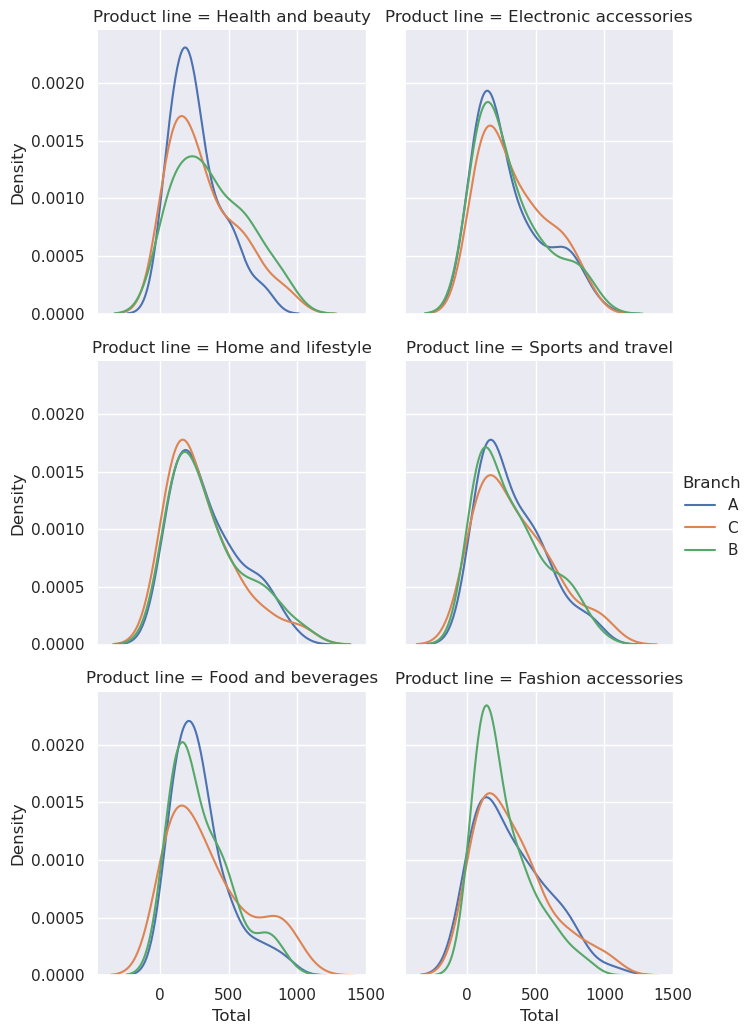

In [18]:
g=sns.FacetGrid(df,col='Product line',hue='Branch',col_wrap=2,height=3.5, aspect=1,)
g.map(sns.kdeplot,'Total')
g.add_legend()
sns.move_legend(g,'center right')
sns.set_theme(font_scale=1)

# Day of the week

In [42]:
from calendar import day_name
df['dayweek']=df['Date'].dt.day_of_week
df['Weekday']=df['Date'].dt.day_name()

df


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,dayweek,Weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,4,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,6,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,6,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1,Tuesday
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,5,Saturday
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,5,Saturday
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,4,Friday


In [44]:
df_sort_date= df.sort_values(by=['Date'])
df_sort_date

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,dayweek,Weekday
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3,1,Tuesday
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7,1,Tuesday
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7,1,Tuesday
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9,1,Tuesday
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,2019-03-30,14:43,Ewallet,874.98,4.761905,43.749,6.0,5,Saturday
881,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12:51,Credit card,81.44,4.761905,4.072,9.5,5,Saturday
963,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,2019-03-30,20:37,Cash,290.46,4.761905,14.523,6.7,5,Saturday
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,10:18,Cash,447.40,4.761905,22.370,7.4,5,Saturday


/tmp/ipykernel_8164/1051558177.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



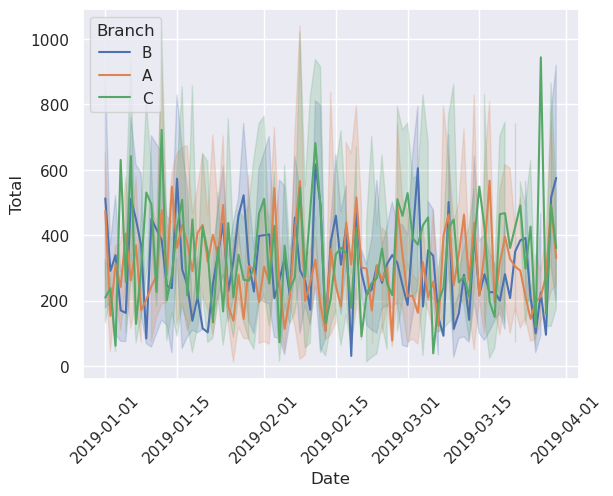

In [53]:
time_purchase=sns.lineplot(data=df_sort_date,x='Date',y='Total',hue='Branch')
time_purchase
time_purchase.set_xticklabels(time_purchase.get_xticklabels(),rotation=45,)
sns.set_theme(font_scale=1)

In [ ]:
df_days= df.groupby(by=['dayweek','Weekday','Branch','Product line'])['Total'].agg(['median','sum'])
df_days

median        sum
dayweek Weekday Branch Product line                                
0       Monday  A      Electronic accessories  194.23950  2347.6215
                       Fashion accessories     462.67200  3116.7360
                       Food and beverages      202.42425  1193.2620
                       Health and beauty       216.43650  2710.7745
                       Home and lifestyle      252.25200  2858.5410
...                                                  ...        ...
6       Sunday  C      Fashion accessories     343.05600  2116.1490
                       Food and beverages      347.95425  3200.5995
                       Health and beauty       293.13900  1748.2290
                       Home and lifestyle      338.21550  3312.7815
                       Sports and travel       348.30600  2345.4795

[126 rows x 2 columns]

In [ ]:
df_days=df_days.reset_index()
df_days=df_days.drop(columns='dayweek')
df_days


,Weekday,Branch,Product line,median,sum
0,Monday,A,Electronic accessories,194.23950,2347.6215
1,Monday,A,Fashion accessories,462.67200,3116.7360
2,Monday,A,Food and beverages,202.42425,1193.2620
3,Monday,A,Health and beauty,216.43650,2710.7745
4,Monday,A,Home and lifestyle,252.25200,2858.5410
...,...,...,...,...,...
121,Sunday,C,Fashion accessories,343.05600,2116.1490
122,Sunday,C,Food and beverages,347.95425,3200.5995
123,Sunday,C,Health and beauty,293.13900,1748.2290
124,Sunday,C,Home and lifestyle,338.21550,3312.7815


/tmp/ipykernel_8164/1571807852.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  week_plt.set_xticklabels(week_plt.get_xticklabels(),rotation=45,)


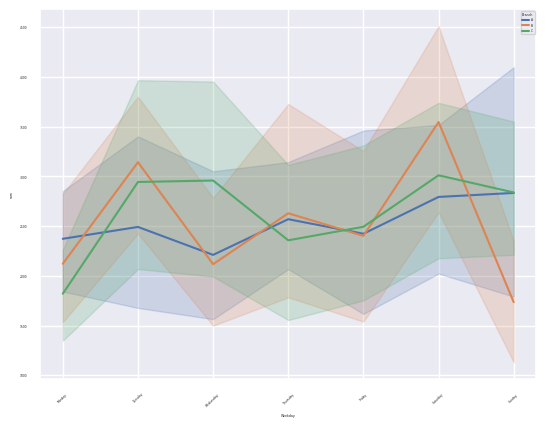

In [ ]:
week_plt= sns.lineplot(data=df_days, x='Weekday',y='sum',hue='Branch')
week_plt.set_xticklabels(week_plt.get_xticklabels(),rotation=45,)
sns.set_theme(font_scale=1)


/tmp/ipykernel_8164/3216785487.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  week_plt2.set_xticklabels(week_plt2.get_xticklabels(),rotation=45,)


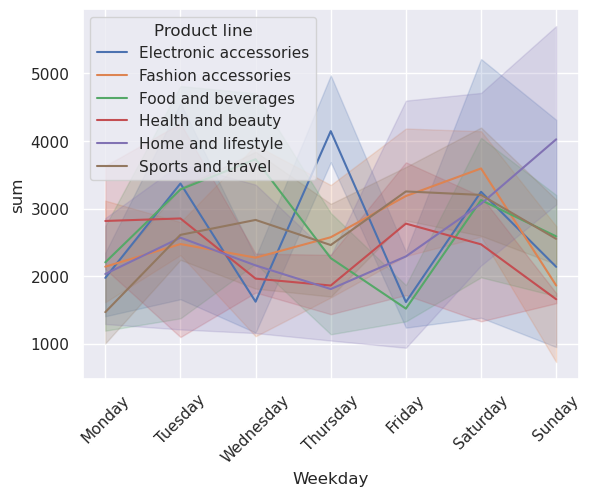

In [ ]:
week_plt2= sns.lineplot(data=df_days, x='Weekday',y='sum',hue='Product line')
week_plt2.set_xticklabels(week_plt2.get_xticklabels(),rotation=45,)
sns.set_theme(font_scale=1)

# Plotly

In [ ]:
import plotly.express as px

In [ ]:
fig= px.pie(df,values='Total',names='Product line',title='Total generated by each Product line')
fig.show()

 We can see how well distributed the transactions for each Product line are.

In [ ]:
fig2= px.pie(df,values='Total',names='Branch',title='Total generated by each Branch')
fig2.show()

Same comment for the Branch.

In [ ]:
fig_bar=px.bar(df_days, x='Weekday',y='sum',color='Branch', title='Daily Total by branch')
fig_bar.show()

Branch A and C are pretty constant during the week whereas branch B has 2 bigger days (Tuesday and Saturday). Moreover on this graph we can see how from  e.g a saturday to another one, how the sum change in terms of money  made.

In [ ]:
fig_sun=px.sunburst(df_days, path=['Branch','Product line','Weekday'],values='sum',color='median')
fig_sun.show()

In [55]:
fig_line=px.line(df_sort_date, x='Date', y='Total',color='Branch')
fig_line.show()

In [56]:
fig_line=px.line(df_sort_date, x='Date', y='Total',color='Product line')
fig_line.show()

# Conclusion

Personnally I prefer plotly as it is interactive and it is fully integrated to streamlit for example.
This data set is super balanced and we saw that all branches are generating more or less the same revenues.
Based on the median of the purchase we could eventually say that Branch A have balanced revenues whereas Branch B (Health, Home) and Branch C (Food, Sports, Electronics) seem to obtain more revenues from specific Product lines.
To make time series future predictions it would be needed more datas. 3 months are not enough to observe potential seasonalities aspect.